In [ ]:
import pandas as pd
import sklearn
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import f1_score,accuracy_score,r2_score
from pprint import pprint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Trial 1


In [ ]:

df_train = pd.read_csv('/content/drive/MyDrive/CISC873/train_new.csv') # to read the csv file from the drive
df_train

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,EUR,10000,0,4.0,2150,0,0,0,...,fantastic_tune,"92 % avis positifs (230,951 notes)",230951,4.311066,53f2db3c104dae6bcae0c271,0,NaN,summer,2020-08,1381
1090,5.00,5,EUR,1000,0,5.0,377,1,0,1,...,zzbllss,"(2,904 notes)",2904,4.422521,592968ba63950d682ca4b195,0,NaN,summer,2020-08,212
1091,9.00,48,EUR,1000,1,4.0,135,0,0,0,...,oiug56465,"78 % avis positifs (6,632 notes)",6632,3.748794,5b6ec2f2838d931d2fbf7a28,0,NaN,summer,2020-08,163
1092,11.00,10,EUR,10000,1,4.0,1479,0,0,0,...,yubenqiang,"83 % avis positifs (5,816 notes)",5816,3.936382,58330d7def56284f7634e5e5,0,NaN,summer,2020-08,674


In [ ]:
df_train.shape #Shape of the dataframe

(1094, 34)

In [ ]:
df_train.info() #Information about all the columns in the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  pro

In [ ]:
df_train = df_train.sample(frac=1) #shuffle the dataset to reduce variance

In [ ]:
df_train['rating'].unique() # Identify the unique values in the column 'rating'

array([4., 5., 3., 2., 6., 1.])

In [ ]:
df_train['rating'].value_counts(normalize=True) # normalized counts of the values in the column 'rating'

4.0    0.707495
5.0    0.155393
3.0    0.123400
2.0    0.010969
1.0    0.001828
6.0    0.000914
Name: rating, dtype: float64

In [ ]:
df_train = df_train.loc[df_train['rating'].isin([1, 2, 3, 4, 5])] # To select all rows with column value of rating has values 1,2,3,4,5
df_train 

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
23,5.91,5,EUR,1000,0,4.0,414,0,0,0,...,liminny,"81 % avis positifs (12,134 notes)",12134,3.866903,58aec90823ef726994a323fe,0,NaN,summer,2020-08,477
704,4.00,4,EUR,100,1,5.0,2,0,0,0,...,hcczhiqiang,"90 % avis positifs (2,707 notes)",2707,4.189139,5808e2beff6c57435af7df2d,0,NaN,summer,2020-08,496
993,5.92,9,EUR,100,1,4.0,17,0,0,0,...,zhenhaogouwuche,"89 % avis positifs (5,106 notes)",5106,4.212887,5adef67640626a4b409b8e94,0,NaN,summer,2020-08,229
422,11.00,168,EUR,10,0,3.0,3,0,0,0,...,wanguanqiuxi,85 % avis positifs (47 notes),47,3.914894,5e71bc2ff2bef60050bd3a86,0,NaN,summer,2020-08,208
46,6.00,56,EUR,1000,1,3.0,938,0,0,0,...,nalininternational,"(13,309 notes)",13309,3.876700,55c89dc93a698c6010edccc4,0,NaN,summer,2020-08,461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,7.00,30,EUR,1000,1,4.0,179,0,0,0,...,naturalcolor,"93 % avis positifs (13,625 notes)",13625,4.382092,59aebfa350df6107c1eff8c8,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,580
52,9.00,8,EUR,1000,1,4.0,248,0,0,0,...,mattolivo,"84 % avis positifs (1,722 notes)",1722,3.906504,58d765d6da2852536d7a3fa9,0,NaN,summer,2020-08,1352
261,11.00,10,EUR,1000,0,5.0,410,0,0,0,...,demangofashionsports,"80 % avis positifs (1,733 notes)",1733,3.842470,57b1288be4830507cc9f586a,0,NaN,summer,2020-08,1218
559,7.00,84,EUR,10000,0,4.0,2526,0,0,0,...,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,1021


In [ ]:
df_train = df_train.drop(['merchant_id', 'merchant_profile_picture', 'id', 'tags'], axis=1) # drop the columns specified which is found to be irrelevant

In [ ]:
df_train= df_train.fillna(0) # fill all null values with 0

In [ ]:
# np.random.rand(len(df)) is an array of size len(df) with randomly and uniformly distributed float values 
#in range [0, 1]. The < 0.7 applies the comparison element-wise and stores the result in place. Thus values < 0.7 become True and value >= 0.7 become False

msk = np.random.rand(len(df_train))<0.7   
print(msk)
tr = df_train[msk]     # To get a training df tr, with 70 percent 
print(tr.shape)
val = df_train[~msk]   # to get the validation dataset which is almost 30% 

[ True False False ...  True  True  True]
(743, 30)


 ## Function to convert the categorical to numerical value

In [ ]:
dict_cat = {}


# columns that are of categorical value
cat_cols = tr.columns[tr.dtypes==object].to_list()



def cat_digit(col):  
    # build the mapping
    encoded = col.astype('category').cat.codes
    # store the mapping
    dict_cat[col.name] = dict(zip(np.asarray(col), np.asarray(encoded)))
    return encoded

print(cat_cols)

['currency_buyer', 'product_color', 'product_variation_size_id', 'shipping_option_name', 'urgency_text', 'origin_country', 'merchant_title', 'merchant_name', 'merchant_info_subtitle', 'theme', 'crawl_month']


In [ ]:
# for each categorical feature, apply cat_digit where we build the mapping and transform the data
# this is for the training set (where we build the mapping)
tr[cat_cols] = tr[cat_cols].apply(lambda col: cat_digit(col))
tr

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_has_profile_picture,theme,crawl_month
23,5.91,5,0,1000,0,4.0,414,0,0,0,...,1,1,366,227,176,12134,3.866903,0,0,0
422,11.00,168,0,10,0,3.0,3,0,0,0,...,0,1,483,440,324,47,3.914894,0,0,0
973,5.85,5,0,10000,0,4.0,1004,0,0,0,...,0,1,265,52,286,7314,3.938201,0,0,0
265,8.00,58,0,5000,0,4.0,920,0,0,0,...,0,1,330,165,493,4632,4.192789,0,0,0
336,7.00,159,0,5000,0,4.0,1632,0,0,0,...,1,1,416,322,386,8547,4.081783,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,1.80,2,0,1000,1,4.0,76,0,0,0,...,0,1,486,447,366,4230,4.041371,0,0,0
52,9.00,8,0,1000,1,4.0,248,0,0,0,...,0,2,124,269,259,1722,3.906504,0,0,0
261,11.00,10,0,1000,0,5.0,410,0,0,0,...,0,1,35,80,162,1733,3.842470,0,0,0
559,7.00,84,0,10000,0,4.0,2526,0,0,0,...,0,1,191,402,297,10501,4.029235,0,0,0


In [ ]:
print('Lets see what the mapping for column origin_country :')
pprint(dict_cat['origin_country'])
print('It is a string to integer mapping')

Lets see what the mapping for column origin_country :
{0: 0, 'CN': 1, 'GB': 2, 'SG': 3, 'US': 4, 'VE': 5}
It is a string to integer mapping


In [ ]:
#  use the mappings built from the training set, to transform the validation set
val[cat_cols] = val[cat_cols].apply(lambda col: col.map(dict_cat[col.name]))
# for string values that not seen in training set, we replace it with -1
val = val.fillna(-1)
val

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_has_profile_picture,theme,crawl_month
704,4.00,4,0,100,1,5.0,2,0,0,0,...,0,1,-1.0,-1.0,-1.0,2707,4.189139,0,0,0
993,5.92,9,0,100,1,4.0,17,0,0,0,...,0,1,-1.0,-1.0,-1.0,5106,4.212887,0,0,0
46,6.00,56,0,1000,1,3.0,938,0,0,0,...,0,1,-1.0,-1.0,-1.0,13309,3.876700,0,0,0
313,8.00,26,0,100,0,5.0,13,0,0,0,...,1,1,97.0,233.0,131.0,138,3.659420,0,0,0
845,5.00,127,0,100,0,3.0,19,0,0,0,...,1,1,479.0,435.0,506.0,9357,4.225393,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,2.76,17,0,1000,1,5.0,49,1,0,1,...,0,1,-1.0,-1.0,-1.0,11505,4.136723,0,0,0
126,8.00,7,0,1000,0,4.0,443,0,0,0,...,0,1,89.0,196.0,186.0,3460,3.870809,0,0,0
702,8.00,122,0,5000,1,4.0,1355,1,1,0,...,0,1,-1.0,-1.0,-1.0,3532,4.199604,0,0,0
770,11.00,26,0,100,1,5.0,1,0,0,0,...,1,1,-1.0,-1.0,-1.0,8685,4.140702,0,0,0


In [ ]:
tr_y = tr['rating'] # the prediction column(dependent value)
tr_x = tr.drop('rating', axis=1) # the df with independent values

In [ ]:
from sklearn.preprocessing import StandardScaler  # normalize the independent values
sc_X=StandardScaler()
tr_x=sc_X.fit_transform(tr_x)


In [ ]:
clf = LogisticRegression(random_state=12).fit(tr_x, tr_y) # use the classifier-logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
val_y = val['rating'] #The dependent values(prediction ) for the validation dataset
val_x = val.drop('rating', axis=1) #   validation df of the independent values 


In [ ]:
from sklearn.preprocessing import StandardScaler # normalise the validation dataset
sc_X=StandardScaler()
val_x=sc_X.fit_transform(val_x)


In [ ]:
pred_val = clf.predict(val_x) # to predict the rating for the validation dataset input


In [ ]:
val_score = accuracy_score(val_y, pred_val) # calculate the accuracy score of the logistic regression classifier
print(val_score)

0.7071005917159763


In [ ]:
models_1 = []
model_names = ['DecisionTreeClassifier1','DecisionTreeClassifier2','SVC1','SVC2','GaussianNB'] # list of the  classifier for prediction

#models.append((LogisticRegression(solver='sag',max_iter=4000,penalty='l2',random_state=123)))
models_1.append((DecisionTreeClassifier(random_state=1,splitter="random",max_depth=3))) #hyper parameters chosen DTC
models_1.append((DecisionTreeClassifier(random_state=1,criterion="entropy",max_depth=5))) #hyperparameters chosen- DTC

models_1.append((SVC(kernel='rbf',gamma='scale',random_state=1234))) # SVC
models_1.append((SVC(kernel='poly',gamma='scale',random_state=1234))) # SVC

models_1.append((GaussianNB())) # Naive Bayesian

print (models_1)

[DecisionTreeClassifier(max_depth=3, random_state=1, splitter='random'), DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1), SVC(random_state=1234), SVC(kernel='poly', random_state=1234), GaussianNB()]


In [ ]:

from sklearn import model_selection
from sklearn.metrics import mean_absolute_error
acc_score=[]
# To perform a k folds cross validation with number of folds =10
kfold = model_selection.KFold(n_splits=10)  

for i in range(0,len(models_1)):    
    cv_result = model_selection.cross_val_score(models_1[i],tr_x,tr_y,cv=kfold,scoring='accuracy') # Cross validation score
    print ('-'*40)
    print ('{0}: {1}'.format(model_names[i],cv_result))
    
    trained_model=models_1[i].fit(tr_x,tr_y) # The fit the model on the training set
    print ('-'*40)
    print ('{0}: {1}'.format(model_names[i],trained_model))
    
    prediction = models_1[i].predict(val_x) # To predict the output for the validation set

    val_score = accuracy_score(val_y,prediction) # Accuracy score for the model
    acc_score.append(val_score) # Append the accuracy score to the list acc_score
    print ('-'*40)
    print ('{0}: {1}'.format(model_names[i],val_score))

----------------------------------------
DecisionTreeClassifier1: [0.78666667 0.62666667 0.69333333 0.71621622 0.75675676 0.75675676
 0.72972973 0.77027027 0.71621622 0.7972973 ]
----------------------------------------
DecisionTreeClassifier1: DecisionTreeClassifier(max_depth=3, random_state=1, splitter='random')
----------------------------------------
DecisionTreeClassifier1: 0.6971428571428572
----------------------------------------
DecisionTreeClassifier2: [0.86666667 0.70666667 0.81333333 0.7972973  0.72972973 0.75675676
 0.77027027 0.7972973  0.75675676 0.86486486]
----------------------------------------
DecisionTreeClassifier2: DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)
----------------------------------------
DecisionTreeClassifier2: 0.6542857142857142
----------------------------------------
SVC1: [0.77333333 0.61333333 0.72       0.68918919 0.72972973 0.77027027
 0.71621622 0.74324324 0.71621622 0.78378378]
------------------------------------

**Plot the accuracy score**

Text(0.5, 1.0, 'Model Accracy')

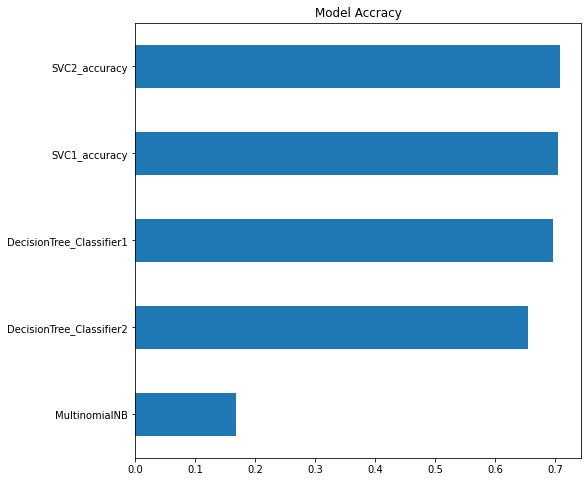

In [ ]:
%matplotlib inline
model_accuracy = pd.Series(data=acc_score, 
        index=['DecisionTree_Classifier1','DecisionTree_Classifier2','SVC1_accuracy','SVC2_accuracy','MultinomialNB'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')

Accuracy scores

Logistic Regression- 0.707

DecisionTreeClassifier(max_depth=3, random_state=1, splitter='random')=0.697 

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)=0.654

SVC(kernel='rbf',gamma='scale',random_state=1234)=0.705

SVC(kernel='poly', random_state=1234)=0.708

GaussianNB 0.168


**Decision Tree  clfr was used** becuse it is one of the popular and most widely used Machine Learning Algorithms because of its robustness to noise, tolerance against missing information, handling of irrelevant, redundant predictive attribute values, low computational cost, interpretability, fast run time and robust predictors.

criterion used here ='gini'(measures the divergences between the probability distributions of the target attribute’s values and splits a node such that it gives the least amount of impurity) and 'entropy'(splits a node such that it gives the most amount of information gain).


splitter: string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

'best'- may be ideal because  it will calculate the best features to split based on the impurity measure and use that to split the nodes,

'random'-a high chance of ending up with features that don’t really give you that much information

: The maximum depth of the tree: If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. 
The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

**Support Vectors Classifier** tries to find the best hyperplane to separate the different classes by maximizing the distance between sample points and the hyperplane.

kernel: 'rbf' and 'poly' use non linear hyperplane to separate the data
gamma:parameter for non linear hyperplane

**GaussianNB**

When we are dealing with the continuous data (or) Numerical Features, Gaussian Naive Bayes is useful.Since we have numerical features in out training set and we have to predict multiple classes we can go for nave bayesian model.It's also suitable for large dimensionality dataset.





**Observation of trial 1**
The classifiers had an accuracy of around 70% ,but few preprocessing steps are included.So for trial2 ,including more exploratory analysis and observe the accuracy



**Trial  2** : 

to do exploratory analysis and check the features

1. Corelation using heatmap
2. relationship plot
-further remove columns (has_urgency_banner','urgency_text','theme','crawl_month') which has no relation with rating and make a new training set and validation set 

- Then apply the classifiers to observe the accuracy score

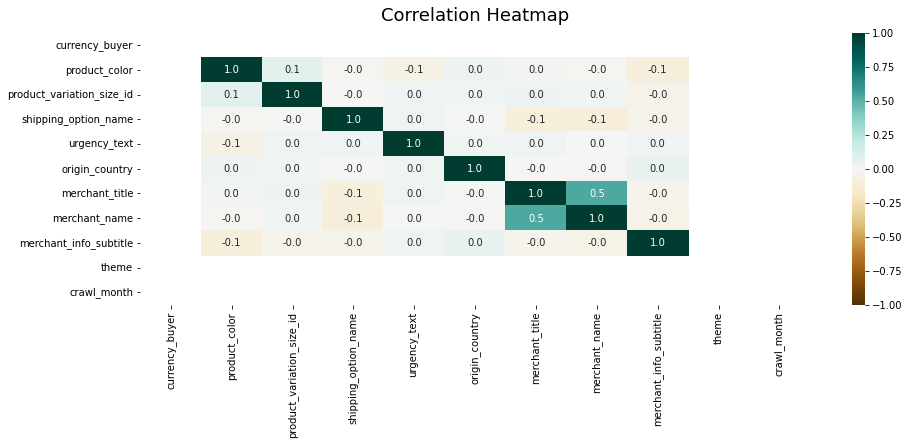

In [ ]:
# Correlation heatmap for the categorical columns
plt.figure(figsize=(15, 5))
heatmap = sns.heatmap(tr[cat_cols].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG',fmt='.1f')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

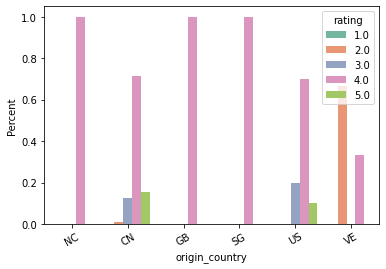

In [ ]:
# to group data by the origin country and rating and plot the barplot of origin_country and colours(hue) indicate the ratings


r_data = (tr.groupby(['origin_country','rating']).size() / tr.groupby(['origin_country']).size()).reset_index().rename({0:'Percent'}, axis=1)
country = sns.barplot(x='origin_country', hue='rating', y='Percent', data=r_data, palette = "Set2")
country.set_xticklabels(['NC','CN','GB','SG','US','VE'],rotation = 30)
plt.show()

It can be observed from the above plot that percentage of rating has some relation with the origin country.

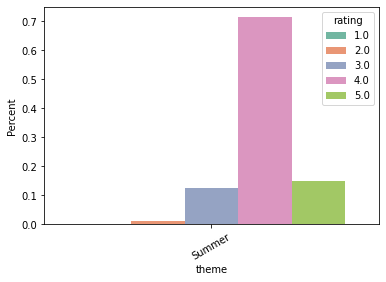

In [ ]:
#relation between theme and rating described percentage wise
r_data1 = (tr.groupby(['theme','rating']).size() / tr.groupby(['theme']).size()).reset_index().rename({0:'Percent'}, axis=1)
country = sns.barplot(x='theme', hue='rating', y='Percent', data=r_data1, palette = "Set2")
country.set_xticklabels(['Summer'],rotation = 30)
plt.show()

It can be observed that the theme doesn't have much effect ,since we have only one theme

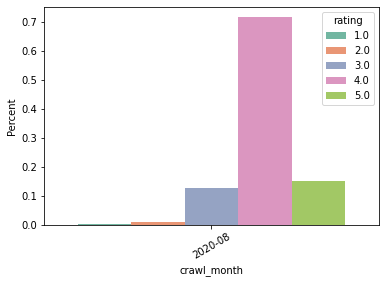

In [ ]:
#relation between crawl month and rating described percentage wise
r_data2 = (tr.groupby(['crawl_month','rating']).size() / tr.groupby(['crawl_month']).size()).reset_index().rename({0:'Percent'}, axis=1)
country = sns.barplot(x='crawl_month', hue='rating', y='Percent', data=r_data2, palette = "Set2")
country.set_xticklabels(['2020-08'],rotation = 30)
plt.show()

It can be observed that since we have only one crawl month it doen't affect the rating.

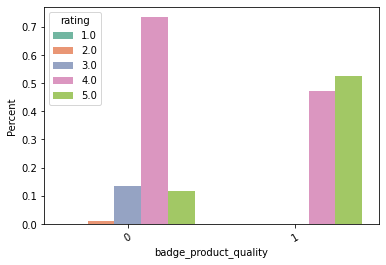

In [ ]:
#relation between badge product quality and rating described percentage wise
r_data3 = (tr.groupby(['badge_product_quality','rating']).size() / tr.groupby(['badge_product_quality']).size()).reset_index().rename({0:'Percent'}, axis=1)
country = sns.barplot(x='badge_product_quality', hue='rating', y='Percent', data=r_data3, palette = "Set2")
country.set_xticklabels(['0','1'],rotation = 30)
plt.show()

In [ ]:
tr1=tr.drop(['has_urgency_banner','urgency_text','theme','crawl_month'],axis=1)
val1=val.drop(['has_urgency_banner','urgency_text','theme','crawl_month'],axis=1)

In [ ]:
tr_y1 = tr1['rating']
tr_x1 = tr1.drop('rating', axis=1)
clf_LR = LogisticRegression().fit(tr_x1, tr_y1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
val_y1 = val1['rating']
val_x1 = val1.drop('rating', axis=1)
pred_val = clf_LR.predict(val_x1)

In [ ]:
val_score = accuracy_score(val_y1, pred_val)
print(val_score)

0.6571428571428571


In [ ]:
models_2 = []
model_names = ['DecisionTreeClassifier1','DecisionTreeClassifier2','SVC1','SVC2','GaussianNB'] # list of the  classifier for prediction

#models.append((LogisticRegression(solver='sag',max_iter=4000,penalty='l2',random_state=123)))
models_2.append((DecisionTreeClassifier(random_state=1,splitter="random",max_depth=3))) #hyper parameters chosen DTC
models_2.append((DecisionTreeClassifier(random_state=1,criterion="entropy",max_depth=5))) #hyperparameters chosen- DTC

models_2.append((SVC(kernel='rbf',gamma='scale',random_state=1234))) # SVC
models_2.append((SVC(kernel='poly',gamma='scale',random_state=1234))) # SVC

models_2.append((GaussianNB())) # Naive Bayesian

print (models_1)

[DecisionTreeClassifier(max_depth=3, random_state=1, splitter='random'), DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1), SVC(random_state=1234), SVC(kernel='poly', random_state=1234), GaussianNB()]


In [ ]:
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error
acc_score=[]
# To perform a k folds cross validation with number of folds =10
kfold = model_selection.KFold(n_splits=10)  

for i in range(0,len(models_2)):    
    cv_result = model_selection.cross_val_score(models_1[i],tr_x1,tr_y1,cv=kfold,scoring='accuracy') # Cross validation score
    print ('-'*40)
    print ('{0}: {1}'.format(model_names[i],cv_result))
    
    trained_model=models_2[i].fit(tr_x1,tr_y1) # The fit the model on the training set
    print ('-'*40)
    print ('{0}: {1}'.format(model_names[i],trained_model))
    
    prediction = models_2[i].predict(val_x1) # To predict the output for the validation set

    val_score = accuracy_score(val_y1,prediction) # Accuracy score for the model
    acc_score.append(val_score) # Append the accuracy score to the list acc_score
    print ('-'*40)
    print ('{0}: {1}'.format(model_names[i],val_score))

----------------------------------------
DecisionTreeClassifier1: [0.76       0.64       0.73333333 0.71621622 0.74324324 0.74324324
 0.71621622 0.78378378 0.7027027  0.77027027]
----------------------------------------
DecisionTreeClassifier1: DecisionTreeClassifier(max_depth=3, random_state=1, splitter='random')
----------------------------------------
DecisionTreeClassifier1: 0.7
----------------------------------------
DecisionTreeClassifier2: [0.85333333 0.70666667 0.81333333 0.7972973  0.71621622 0.75675676
 0.77027027 0.7972973  0.75675676 0.86486486]
----------------------------------------
DecisionTreeClassifier2: DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)
----------------------------------------
DecisionTreeClassifier2: 0.7542857142857143
----------------------------------------
SVC1: [0.76       0.57333333 0.72       0.66216216 0.72972973 0.74324324
 0.7027027  0.77027027 0.7027027  0.77027027]
----------------------------------------
SVC1: SVC(

Text(0.5, 1.0, 'Model Accracy')

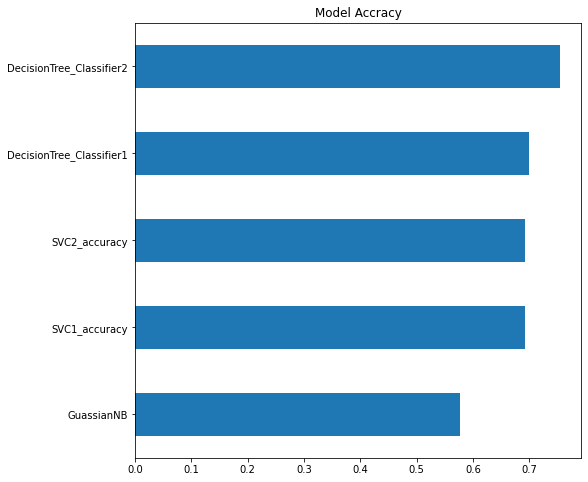

In [ ]:
%matplotlib inline
model_accuracy = pd.Series(data=acc_score, 
        index=['DecisionTree_Classifier1','DecisionTree_Classifier2','SVC1_accuracy','SVC2_accuracy','GuassianNB'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')

**Obervations on trial 2**

The accuracies have shown an increase compaired to trial 1


Logistic Regression- 0.657

**DecisionTreeClassifier**(max_depth=3, random_state=1, splitter='random')=**0.70 **

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)=0.754

SVC(kernel='rbf',gamma='scale',random_state=1234)=0.691

SVC(kernel='poly', random_state=1234)=0.691

GaussianNB 0.577

There are still chances to improve the accuracy scores.

**Plan for trial 3**:
    
    Remove all the irrelevant columns as from the prevoius trials
                  
    Fill the null values in categorical column by mode instead of replacing by 0
                  
    Replace the categorical values by numerical values using categorical encoding

    Use the train_test_split fuction of sklearn and split the entire dataset(here 0.25)
    Normalize the train and validation sets

    Train the models and find the accuracy_score

**Trial** **3**   

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/CISC873/train_new.csv') # to read the csv file from the drive


In [ ]:
df_train1=df_train.copy(deep=True) # To copy the training set to new df df_train1
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  pro

In [ ]:
# To remove all irrelevant columns
df_train1 = df_train1.loc[df_train1['rating'].isin([1, 2, 3, 4, 5])]# to select only rows that rating fallls within 1-5
df_train1=df_train1.drop(['merchant_id', 'merchant_profile_picture', 'id', 'tags','has_urgency_banner','urgency_text','theme','crawl_month','currency_buyer'],axis=1)

In [ ]:
df_train1.info() # to get information of the columns in the df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1093
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1093 non-null   float64
 1   retail_price                  1093 non-null   int64  
 2   units_sold                    1093 non-null   int64  
 3   uses_ad_boosts                1093 non-null   int64  
 4   rating                        1093 non-null   float64
 5   rating_count                  1093 non-null   int64  
 6   badges_count                  1093 non-null   int64  
 7   badge_local_product           1093 non-null   int64  
 8   badge_product_quality         1093 non-null   int64  
 9   badge_fast_shipping           1093 non-null   int64  
 10  product_color                 1064 non-null   object 
 11  product_variation_size_id     1081 non-null   object 
 12  product_variation_inventory   1093 non-null   int64  
 13  shi

In [ ]:
df_train1.isnull().sum()  # returns the number of missing values in each column

price                            0
retail_price                     0
units_sold                       0
uses_ad_boosts                   0
rating                           0
rating_count                     0
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
product_color                   29
product_variation_size_id       12
product_variation_inventory      0
shipping_option_name             0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
inventory_total                  0
origin_country                  12
merchant_title                   0
merchant_name                    4
merchant_info_subtitle           0
merchant_rating_count            0
merchant_rating                  0
merchant_has_profile_picture     0
dtype: int64

In [ ]:
df_train1[['product_color','product_variation_size_id','origin_country','merchant_name','rating']] # to view the columns of missing values

,product_color,product_variation_size_id,origin_country,merchant_name,rating
0,yellow,M,CN,keepahorse,4.0
1,black,L,CN,上海铭启电气科技有限公司,4.0
2,white,L,CN,zhaodongmei,4.0
3,lakeblue,XS,CN,pookie0331,3.0
4,apricot,S,CN,shitongyi12683626,4.0
...,...,...,...,...,...
1089,red,S,CN,fantastic_tune,4.0
1090,NaN,H01,CN,zzbllss,5.0
1091,purple,M,CN,oiug56465,4.0
1092,black,M,CN,yubenqiang,4.0


In [ ]:
#The count of the items in the columns
[df_train1['product_color'].value_counts(),df_train1['product_variation_size_id'].value_counts(),df_train1['origin_country'].value_counts(),df_train1['merchant_name'].value_counts()]

[black             219
 white             173
 blue               77
 yellow             69
 pink               68
                  ... 
 rainbow             1
 claret              1
 whitestripe         1
 light green         1
 brown & yellow      1
 Name: product_color, Length: 86, dtype: int64, S           444
 XS          248
 M           135
 XXS          76
 L            29
            ... 
 pants-S       1
 XXXXL         1
 SIZE-XXS      1
 1pc           1
 H01           1
 Name: product_variation_size_id, Length: 83, dtype: int64, CN    1053
 US      22
 VE       3
 SG       2
 GB       1
 Name: origin_country, dtype: int64, greatexpectationstechnology              8
 广州唯适唯服饰有限公司                              7
 sangboostore                             6
 shuilingjiaointernationaltradecompany    6
 fengjinying                              6
                                         ..
 wwenliping                               1
 yourvogue                                1
 caoho

Function to convert categorical to numerical value

In [ ]:
dict_cat = {}


# columns that are of categorical value
cat_cols = df_train1.columns[df_train1.dtypes==object].to_list()



def cat_digit(col):  
    # build the mapping
    encoded = col.astype('category').cat.codes
    # store the mapping
    dict_cat[col.name] = dict(zip(np.asarray(col), np.asarray(encoded)))
    return encoded

print(cat_cols)

['product_color', 'product_variation_size_id', 'shipping_option_name', 'origin_country', 'merchant_title', 'merchant_name', 'merchant_info_subtitle']


In [ ]:
df_train1[cat_cols] = df_train1[cat_cols].apply(lambda col: cat_digit(col)) # Apply the function to all categorical columns


In [ ]:
# To replace the null values in product_color column by mode of dataframe grouping by unit's sold
df_train1["product_color"] = df_train1.groupby(["units_sold"],
                                          sort=False)["product_color"].apply(lambda x:x.fillna(x.mode()))


In [ ]:
# To replace the null values in product size id  column by mode of dataframe grouping by unit's sold
df_train1['product_variation_size_id']=df_train1.groupby(["units_sold"],
                                          sort=False)['product_variation_size_id'].apply(lambda x:x.fillna(x.mode()))


In [ ]:
#To replace the null values in origin_country column by mode of dataframe grouping by unit's sold
df_train1['origin_country']=df_train1.groupby(["units_sold"],
                                          sort=False)['origin_country'].apply(lambda x:x.fillna(x.mode()))


In [ ]:
#To replace the null values in merchant name column by mode of dataframe grouping by unit's sold
df_train1['merchant_name']=df_train1.groupby(["units_sold"],
                                          sort=False)['merchant_name'].apply(lambda x:x.fillna(x.mode()))


In [ ]:
df_train1.isnull().sum() # returns the number of missing values in each column,to make sure there is no missing values

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
origin_country                  0
merchant_title                  0
merchant_name                   0
merchant_info_subtitle          0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
dtype: int64

In [ ]:
y = df_train1['rating'] # Target column(dependent)
X= df_train1.drop(['rating'], axis=1) # df of independent values

In [ ]:
#import the necessary module
from sklearn.model_selection import train_test_split # default split by 0.25

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2,random_state = 0)


print ("Train dataset: {0}{1}".format(train_X.shape, train_y.shape))
print ("Validation dataset: {0}{1}".format(val_X.shape, val_y.shape))

Train dataset: (874, 24)(874,)
Validation dataset: (219, 24)(219,)


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler().fit_transform(train_X) # normalize trainning set by standard scalar


In [ ]:
from sklearn import preprocessing

scaler1 = preprocessing.MinMaxScaler().fit_transform(val_X) # normalize validation set

DecisionTreeClassifier is capable of both binary (where the labels are [-1, 1]) classification and multiclass (where the labels are [0, …, K-1]) classification

In [ ]:
models_3 = []
model_names = ['DecisionTreeClassifier1','DecisionTreeClassifier2','SVC1','SVC2','GaussianNB'] # list of the  classifier for prediction

#models.append((LogisticRegression(solver='sag',max_iter=4000,penalty='l2',random_state=123)))
models_3.append((DecisionTreeClassifier(random_state=1,splitter="random",max_depth=5))) #hyper parameters chosen DTC
models_3.append((DecisionTreeClassifier(random_state=1,criterion="entropy",max_depth=3))) #hyperparameters chosen- DTC

models_3.append((SVC(kernel='rbf',gamma='scale',random_state=1234))) # SVC
models_3.append((SVC(kernel='poly',gamma='scale',random_state=1234))) # SVC

models_3.append((GaussianNB())) # Naive Bayesian

print (models_3)

[DecisionTreeClassifier(max_depth=5, random_state=1, splitter='random'), DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1), SVC(random_state=1234), SVC(kernel='poly', random_state=1234), GaussianNB()]


In [ ]:
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error
acc_score=[]
# To perform a k folds cross validation with number of folds =10
kfold = model_selection.KFold(n_splits=10)  

for i in range(0,len(models_3)):    
    cv_result = model_selection.cross_val_score(models_3[i],train_X,train_y,cv=kfold,scoring='accuracy') # Cross validation score
    print ('-'*40)
    print ('{0}: {1}'.format(model_names[i],cv_result))
    
    trained_model=models_3[i].fit(train_X,train_y) # The fit the model on the training set
    print ('-'*40)
    print ('{0}: {1}'.format(model_names[i],trained_model))
    
    prediction = models_3[i].predict(val_X) # To predict the output for the validation set

    val_score = accuracy_score(val_y,prediction) # Accuracy score for the model
    acc_score.append(val_score) # Append the accuracy score to the list acc_score
    print ('-'*40)
    print ('{0}: {1}'.format(model_names[i],val_score))

----------------------------------------
DecisionTreeClassifier1: [0.67045455 0.76136364 0.73863636 0.77272727 0.68965517 0.66666667
 0.77011494 0.70114943 0.72413793 0.77011494]
----------------------------------------
DecisionTreeClassifier1: DecisionTreeClassifier(max_depth=5, random_state=1, splitter='random')
----------------------------------------
DecisionTreeClassifier1: 0.6894977168949772
----------------------------------------
DecisionTreeClassifier2: [0.68181818 0.78409091 0.76136364 0.81818182 0.74712644 0.72413793
 0.77011494 0.74712644 0.7816092  0.7816092 ]
----------------------------------------
DecisionTreeClassifier2: DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)
----------------------------------------
DecisionTreeClassifier2: 0.7671232876712328
----------------------------------------
SVC1: [0.67045455 0.73863636 0.70454545 0.71590909 0.67816092 0.71264368
 0.74712644 0.70114943 0.73563218 0.74712644]
------------------------------------

Text(0.5, 1.0, 'Model Accracy')

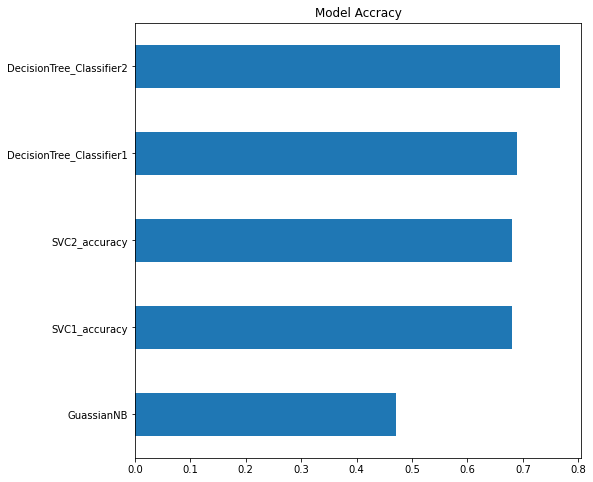

In [ ]:
%matplotlib inline
model_accuracy = pd.Series(data=acc_score, 
        index=['DecisionTree_Classifier1','DecisionTree_Classifier2','SVC1_accuracy','SVC2_accuracy','GuassianNB'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')

**Observations**
The accuracies have shown an increase compaired to trial 3 for the decision tree classifier.

Logistic Regression- 0.657

DecisionTreeClassifier(max_depth=5, random_state=1, splitter='random')=*0.70 *    68.9

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)=0.754   76.79

SVC(kernel='rbf',gamma='scale',random_state=1234)=0.691   68.0

SVC(kernel='poly', random_state=1234)=0.691   68.0

GaussianNB 0.577   .47

There are still chances to improve the accuracy scores. The dependence on categorical variables to rating is not checked ,The correlated columns can be removed to reduce overfitting

**Plan for Trial 4**




**Method 4** Preprocessing: 
                            

                            1.Replace the missing value in categotical by mode 

                            2.Provide dummy encoding to categorical variables

                            3. Remove columns found insignificant

In [ ]:
df_train4 = pd.read_csv('/content/drive/MyDrive/CISC873/train_new.csv') # to read the csv file from the drive


In [ ]:
df_train4 = df_train4.sample(frac=1) #shuffle
df_train4 = df_train4.loc[df_train4['rating'].isin([1, 2, 3, 4, 5])] # to select rows whose rating is btwn 1-5
df_train4 = df_train4.drop(['merchant_id', 'merchant_profile_picture', 'id', 'tags','has_urgency_banner','urgency_text','theme','crawl_month','currency_buyer'], axis=1)

In [ ]:
df_train4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 447 to 443
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1093 non-null   float64
 1   retail_price                  1093 non-null   int64  
 2   units_sold                    1093 non-null   int64  
 3   uses_ad_boosts                1093 non-null   int64  
 4   rating                        1093 non-null   float64
 5   rating_count                  1093 non-null   int64  
 6   badges_count                  1093 non-null   int64  
 7   badge_local_product           1093 non-null   int64  
 8   badge_product_quality         1093 non-null   int64  
 9   badge_fast_shipping           1093 non-null   int64  
 10  product_color                 1064 non-null   object 
 11  product_variation_size_id     1081 non-null   object 
 12  product_variation_inventory   1093 non-null   int64  
 13  sh

In [ ]:
df_train4.isnull().sum()

price                            0
retail_price                     0
units_sold                       0
uses_ad_boosts                   0
rating                           0
rating_count                     0
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
product_color                   29
product_variation_size_id       12
product_variation_inventory      0
shipping_option_name             0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
inventory_total                  0
origin_country                  12
merchant_title                   0
merchant_name                    4
merchant_info_subtitle           0
merchant_rating_count            0
merchant_rating                  0
merchant_has_profile_picture     0
dtype: int64

In [ ]:

# columns that are of categorical value
cat_cols = df_train4.columns[df_train4.dtypes==object].to_list()
cat_cols

['product_color',
 'product_variation_size_id',
 'shipping_option_name',
 'origin_country',
 'merchant_title',
 'merchant_name',
 'merchant_info_subtitle']

In [ ]:
df_train4[cat_cols]=df_train4[cat_cols].fillna(df_train4.mode().iloc[0]) # replace the null values in categorical column by mode

In [ ]:
df_numeric=pd.concat([df_train4,pd.get_dummies(df_train4[cat_cols],prefix=cat_cols,drop_first=True)],axis=1) # to use dummy encoding technique to replace categorical valued

In [ ]:
df_numeric.drop(cat_cols,axis=1,inplace=True) # to drop the initial categorical columns

In [ ]:
df_numeric

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,"merchant_info_subtitle_95 % avis positifs (19,184 notes)","merchant_info_subtitle_95 % avis positifs (2,038 notes)","merchant_info_subtitle_95 % avis positifs (2,805 notes)","merchant_info_subtitle_95 % avis positifs (3,439 notes)","merchant_info_subtitle_95 % avis positifs (3,682 notes)","merchant_info_subtitle_95 % avis positifs (47,476 notes)",merchant_info_subtitle_95 % avis positifs (537 notes),"merchant_info_subtitle_95 % avis positifs (6,719 notes)","merchant_info_subtitle_96 % avis positifs (10,622 notes)",merchant_info_subtitle_97 % avis positifs (160 notes)
447,12.0,11,5000,0,3.0,434,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
937,26.0,168,100,1,5.0,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
333,6.0,6,1000,0,4.0,352,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
542,6.0,13,20000,1,4.0,1124,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
905,6.0,6,1000,1,4.0,895,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,9.0,9,20000,0,4.0,4874,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150,7.0,33,100,0,3.0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229,2.0,9,100,1,4.0,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1037,8.0,7,10000,1,4.0,2069,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df_numeric['rating']
X= df_numeric.drop(['rating'], axis=1)

In [ ]:
#import the necessary module
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)


print ("Train dataset: {0}{1}".format(train_X.shape, train_y.shape))
print ("Validation dataset: {0}{1}".format(val_X.shape, val_y.shape))

Train dataset: (819, 2495)(819,)
Validation dataset: (274, 2495)(274,)


In [ ]:
models_4 = []
model_names = ['DecisionTreeClassifier1','DecisionTreeClassifier2','SVC1','SVC2','GaussianNB'] # list of the  classifier for prediction

#models.append((LogisticRegression(solver='sag',max_iter=4000,penalty='l2',random_state=123)))
models_4.append((DecisionTreeClassifier(random_state=1,splitter="random",max_depth=3))) #hyper parameters chosen DTC
models_4.append((DecisionTreeClassifier(random_state=1,criterion="entropy",max_depth=3))) #hyperparameters chosen- DTC

models_4.append((SVC(kernel='rbf',gamma='scale',random_state=1234))) # SVC
models_4.append((SVC(kernel='poly',gamma='scale',random_state=1234))) # SVC

models_4.append((GaussianNB())) # Naive Bayesian

print (models_4)

[DecisionTreeClassifier(max_depth=3, random_state=1, splitter='random'), DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1), SVC(random_state=1234), SVC(kernel='poly', random_state=1234), GaussianNB()]


In [ ]:
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error
acc_score=[]
# To perform a k folds cross validation with number of folds =10
kfold = model_selection.KFold(n_splits=10)  

for i in range(0,len(models_4)):    
    cv_result = model_selection.cross_val_score(models_4[i],train_X,train_y,cv=kfold,scoring='accuracy') # Cross validation score
    print ('-'*40)
    print ('{0}: {1}'.format(model_names[i],cv_result))
    
    trained_model=models_4[i].fit(train_X,train_y) # The fit the model on the training set
    print ('-'*40)
    print ('{0}: {1}'.format(model_names[i],trained_model))
    
    prediction = models_4[i].predict(val_X) # To predict the output for the validation set

    val_score = accuracy_score(val_y,prediction) # Accuracy score for the model
    acc_score.append(val_score) # Append the accuracy score to the list acc_score
    print ('-'*40)
    print ('{0}: {1}'.format(model_names[i],val_score))

----------------------------------------
DecisionTreeClassifier1: [0.73170732 0.74390244 0.68292683 0.75609756 0.73170732 0.73170732
 0.63414634 0.74390244 0.70731707 0.74074074]
----------------------------------------
DecisionTreeClassifier1: DecisionTreeClassifier(max_depth=3, random_state=1, splitter='random')
----------------------------------------
DecisionTreeClassifier1: 0.708029197080292
----------------------------------------
DecisionTreeClassifier2: [0.75609756 0.80487805 0.75609756 0.76829268 0.75609756 0.73170732
 0.65853659 0.79268293 0.75609756 0.72839506]
----------------------------------------
DecisionTreeClassifier2: DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)
----------------------------------------
DecisionTreeClassifier2: 0.791970802919708
----------------------------------------
SVC1: [0.7195122  0.73170732 0.67073171 0.73170732 0.67073171 0.67073171
 0.65853659 0.74390244 0.73170732 0.72839506]
--------------------------------------

Text(0.5, 1.0, 'Model Accracy')

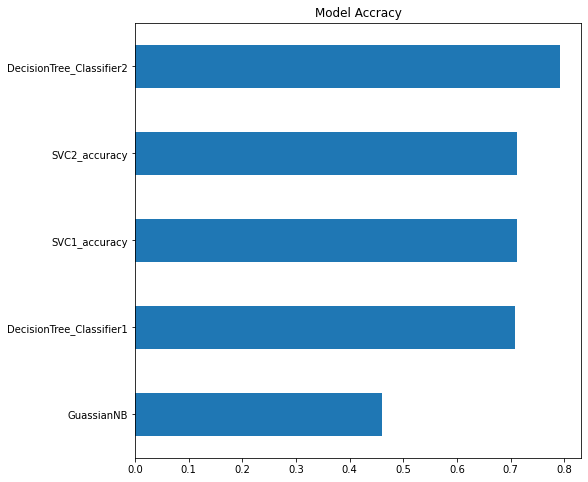

In [ ]:
%matplotlib inline
model_accuracy = pd.Series(data=acc_score, 
        index=['DecisionTree_Classifier1','DecisionTree_Classifier2','SVC1_accuracy','SVC2_accuracy','GuassianNB'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')

**Observations**
The accuracy have shown a good improvement ,but dummy encoding has produced too many columns which is undesirable.Several columns have 0s and a few of them have 1s(sparsity of dataset). In other words, it creates multiple dummy features in the dataset without adding much information.

Due to the massive increase in the dataset, coding slows down the learning of the model along with deteriorating the overall performance that ultimately makes the model computationally expensive. Further, while using tree-based models these encodings are not an optimum choice.


**Plan for Trial 5**

-To replace the missing values in categorical columns by mode

-To do frequency encoding of the categorical variables and then do association testing (btwn categorical variables and 'rating')using ANOVA

-Remove columns having p< 0.05(correlated)

-Normalize using Standard Scalar

-Use SelectKBest and f_classif for univariate feature selection(selected 15 features based on F value)

-Split data using train_test_split

-perform k fold cross validation (n=10)

-find accuracy of the models


**Method 5**

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/CISC873/train_new.csv') # to read the csv file from the drive
df_train = df_train.sample(frac=1) #shuffle
df_train = df_train.loc[df_train['rating'].isin([1, 2, 3, 4, 5])] # to select all those rows whose rating is btwn 1-5
df_train5=df_train.copy(deep=True) # to copy the taining dataset to newndf 

In [ ]:
df_train5 = df_train5.sample(frac=1) #shuffle
# Remove irrelevant columns
df_train5 = df_train5.drop(['merchant_id', 'merchant_profile_picture', 'id', 'tags','has_urgency_banner','urgency_text','theme','crawl_month'], axis=1)
df_train5

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_has_profile_picture
1034,11.0,10,EUR,1000,0,4.0,249,0,0,0,...,0,21,50,CN,fuzhoushicangshanqutiantuwenhuachuanboyouxiang...,福州市仓山区天途文化传播有限公司,"(8,989 notes)",8989,3.851930,1
887,5.0,5,EUR,100,1,3.0,25,0,0,0,...,0,35,50,CN,cloudya,cloudya,85 % avis positifs (98 notes),98,3.918367,0
693,9.0,49,EUR,100,1,4.0,109,0,0,0,...,0,36,50,CN,huajitoup,huajitoup,88 % avis positifs (267 notes),267,4.041199,0
758,6.0,9,EUR,1000,0,4.0,245,0,0,0,...,0,40,50,CN,loft415,loft415,"(7,363 notes)",7363,4.106343,0
885,7.0,9,EUR,10000,1,5.0,1838,1,0,1,...,0,43,50,CN,yangboyang,yangboyang,"89 % avis positifs (8,727 notes)",8727,4.161797,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,11.0,10,EUR,100,1,4.0,71,0,0,0,...,0,35,50,CN,sklioppp,sklioppp,"86 % avis positifs (2,782 notes)",2782,4.069015,0
363,8.0,11,EUR,100,0,3.0,21,0,0,0,...,0,17,50,CN,xbxiaodian,xbxiaodian,81 % avis positifs (31 notes),31,3.580645,0
191,6.0,6,EUR,5000,1,4.0,609,0,0,0,...,0,38,50,CN,xingle,xingle,"83 % avis positifs (1,411 notes)",1411,3.923459,0
243,5.0,51,EUR,10,0,5.0,0,0,0,0,...,0,36,50,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,0


In [ ]:
import numpy as np
num_cols=df_train5.select_dtypes([np.number]).columns
num_cols

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping',
       'product_variation_inventory', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture'],
      dtype='object')

In [ ]:

# columns that are of categorical value
cat_cols = df_train5.columns[df_train5.dtypes==object].to_list()
cat_cols

['currency_buyer',
 'product_color',
 'product_variation_size_id',
 'shipping_option_name',
 'origin_country',
 'merchant_title',
 'merchant_name',
 'merchant_info_subtitle']

In [ ]:
df_train5.isnull().sum()

price                            0
retail_price                     0
currency_buyer                   0
units_sold                       0
uses_ad_boosts                   0
rating                           0
rating_count                     0
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
product_color                   29
product_variation_size_id       12
product_variation_inventory      0
shipping_option_name             0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
inventory_total                  0
origin_country                  12
merchant_title                   0
merchant_name                    4
merchant_info_subtitle           0
merchant_rating_count            0
merchant_rating                  0
merchant_has_profile_picture     0
dtype: int64

In [ ]:
df_train5[cat_cols]=df_train5[cat_cols].fillna(df_train5.mode().iloc[0]) # replace the null values in categorical column by mode

df_train5.isnull().sum()

price                           0
retail_price                    0
currency_buyer                  0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
origin_country                  0
merchant_title                  0
merchant_name                   0
merchant_info_subtitle          0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
dtype: int64

In [ ]:
!pip install association_metrics 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# to drop the columns whose p<0.05 (correlated)
df_train5 = df_train5.drop(['currency_buyer','product_color','product_variation_size_id','merchant_info_subtitle'], axis=1)

In [ ]:


# Frequency encoding of categorical columns :The category is assigned as per the frequency of values in its total lot.
fe1 = df_train5.groupby('shipping_option_name').size() #Grouping by shipping_option_name column:
fe_1 = fe1/len(df_train5) #Dividing by length:



fe2 = df_train5.groupby('origin_country').size() #Grouping by origin_country column:
fe_2 = fe2/len(df_train5) # Dividing by length

fe3 = df_train5.groupby('merchant_title').size() # Grouping by merchant_title
fe_3 = fe3/len(df_train5) #Dividing by length

fe4 = df_train5.groupby('merchant_name').size()#Grouping by merchant_name column
fe_4 = fe4/len(df_train5)# Dividing by lemgth

#Mapping and rounding off:
df_train5['shipping_name']=df_train5['shipping_option_name'].map(fe1).round(2)
df_train5['country']=df_train5['origin_country'].map(fe2).round(2)
df_train5['title']=df_train5['merchant_title'].map(fe3).round(2)
df_train5['name_merchant']=df_train5['merchant_name'].map(fe4).round(2)

# Drop the initial categorical columns
df_train5 = df_train5.drop([ 'shipping_option_name','origin_country','merchant_title','merchant_name'], axis=1)
#df_train5.info()

In [ ]:
import association_metrics as am
import statsmodels.api as sm
from statsmodels.formula.api import ols
# To perform ANOVA to find the correlation of categorical VS numerical column
lm=ols('shipping_name ~ rating', data=df_train5).fit()
table=sm.stats.anova_lm(lm)
print(table)

              df        sum_sq       mean_sq        F    PR(>F)
rating       1.0  9.647018e+04  96470.184317  2.21627  0.136852
Residual  1091.0  4.748923e+07  43528.163952      NaN       NaN


In [ ]:
df_train5

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,shipping_is_express,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating,merchant_has_profile_picture,shipping_name,country,title,name_merchant
1034,11.0,10,1000,0,4.0,249,0,0,0,0,...,0,21,50,8989,3.851930,1,1047,1065,4,4
887,5.0,5,100,1,3.0,25,0,0,0,0,...,0,35,50,98,3.918367,0,1047,1065,1,1
693,9.0,49,100,1,4.0,109,0,0,0,0,...,0,36,50,267,4.041199,0,1047,1065,1,1
758,6.0,9,1000,0,4.0,245,0,0,0,0,...,0,40,50,7363,4.106343,0,1047,1065,2,2
885,7.0,9,10000,1,5.0,1838,1,0,1,0,...,0,43,50,8727,4.161797,0,1047,1065,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,11.0,10,100,1,4.0,71,0,0,0,0,...,0,35,50,2782,4.069015,0,1047,1065,5,5
363,8.0,11,100,0,3.0,21,0,0,0,0,...,0,17,50,31,3.580645,0,1047,1065,2,2
191,6.0,6,5000,1,4.0,609,0,0,0,0,...,0,38,50,1411,3.923459,0,1047,1065,1,1
243,5.0,51,10,0,5.0,0,0,0,0,0,...,0,36,50,295,3.989831,0,1047,1065,3,3


In [ ]:
import numpy as np
num_cols=df_train5.select_dtypes([np.number]).columns
num_cols

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping',
       'product_variation_inventory', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'shipping_name', 'country', 'title',
       'name_merchant'],
      dtype='object')

In [ ]:
# to remove 'rating ' from the column so as to fit the training dataset

print(type(num_cols))
num_cols.shape
num_cols_new=num_cols.delete(4)
num_cols_new

<class 'pandas.core.indexes.base.Index'>


Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'shipping_name', 'country', 'title',
       'name_merchant'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler # Standard Scalar for normalisation
sc_std=StandardScaler().fit(df_train5[num_cols_new]) #fit the training dataset
df_train5[num_cols_new]=sc_std.transform(df_train5[num_cols_new]) # tranform 
df_train5

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,shipping_is_express,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating,merchant_has_profile_picture,shipping_name,country,title,name_merchant
1034,0.708381,-0.430700,-0.358556,-0.873443,4.0,-0.327557,-0.32654,-0.139963,-0.301361,-0.10536,...,-0.042816,-0.964734,0.053144,-0.206496,-0.918993,2.330110,0.209603,0.16214,1.331418,1.096819
887,-0.856277,-0.587943,-0.450162,1.144894,3.0,-0.437502,-0.32654,-0.139963,-0.301361,-0.10536,...,-0.042816,-0.271535,0.053144,-0.309686,-0.587333,-0.429164,0.209603,0.16214,-0.740589,-0.663567
693,0.186828,0.795798,-0.450162,1.144894,4.0,-0.396273,-0.32654,-0.139963,-0.301361,-0.10536,...,-0.042816,-0.222021,0.053144,-0.307725,0.025850,-0.429164,0.209603,0.16214,-0.740589,-0.663567
758,-0.595500,-0.462149,-0.358556,-0.873443,4.0,-0.329520,-0.32654,-0.139963,-0.301361,-0.10536,...,-0.042816,-0.023964,0.053144,-0.225368,0.351055,-0.429164,0.209603,0.16214,-0.049920,-0.076772
885,-0.334724,-0.462149,0.557503,1.144894,5.0,0.452368,2.55175,-0.139963,3.318281,-0.10536,...,-0.042816,0.124578,0.053144,-0.209537,0.627887,-0.429164,0.209603,0.16214,-0.740589,-0.663567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,0.708381,-0.430700,-0.450162,1.144894,4.0,-0.414924,-0.32654,-0.139963,-0.301361,-0.10536,...,-0.042816,-0.271535,0.053144,-0.278535,0.164713,-0.429164,0.209603,0.16214,2.022087,1.683614
363,-0.073948,-0.399251,-0.450162,-0.873443,3.0,-0.439465,-0.32654,-0.139963,-0.301361,-0.10536,...,-0.042816,-1.162791,0.053144,-0.310464,-2.273271,-0.429164,0.209603,0.16214,-0.049920,-0.076772
191,-0.595500,-0.556495,0.048581,1.144894,4.0,-0.150859,-0.32654,-0.139963,-0.301361,-0.10536,...,-0.042816,-0.122993,0.053144,-0.294447,-0.561918,-0.429164,0.209603,0.16214,-0.740589,-0.663567
243,-0.856277,0.858695,-0.459322,-0.873443,5.0,-0.449773,-0.32654,-0.139963,-0.301361,-0.10536,...,-0.042816,-0.222021,0.053144,-0.307400,-0.230583,-0.429164,0.209603,0.16214,0.640749,0.510023


In [ ]:
df_train5.isnull().sum()

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_variation_inventory     0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
shipping_name                   0
country                         0
title                           0
name_merchant                   0
dtype: int64

**Univariate Plots**

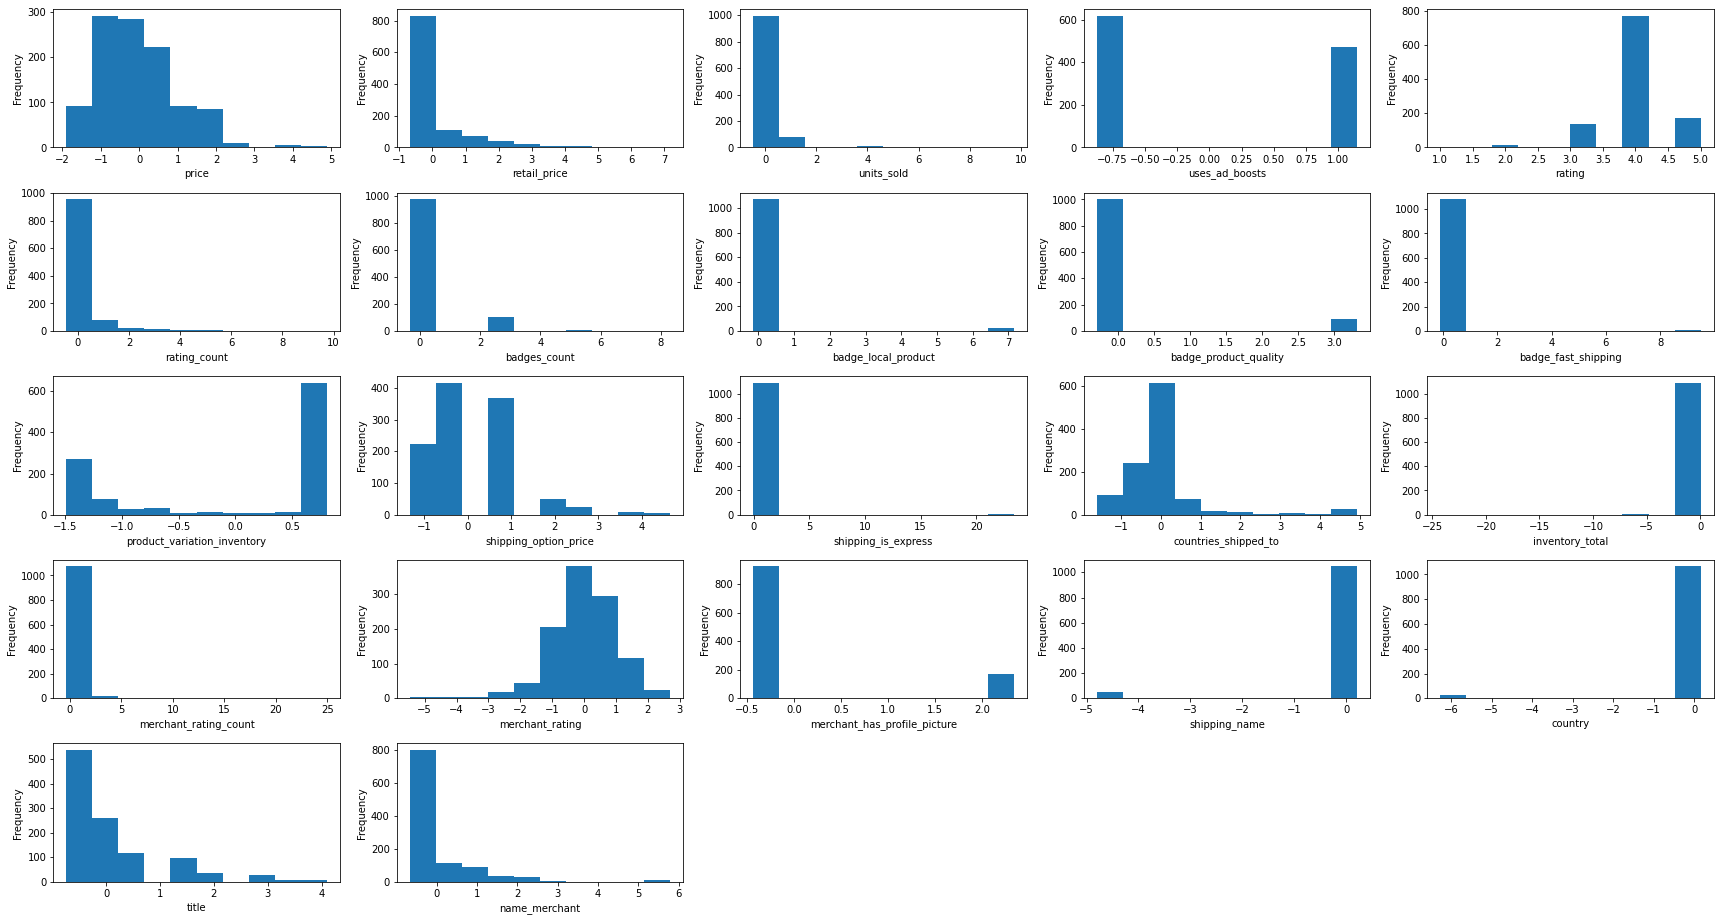

In [ ]:
fig=plt.figure(figsize=(24,15))
i=0
for column in df_train5:
  sub=fig.add_subplot(6,5,i+1)
  sub.set_xlabel(column)
  df_train5[column].plot(kind='hist')
  plt.tight_layout()
  i=i+1

In [ ]:

y = df_train5['rating'] # target column
X= df_train5.drop(['rating'],axis=1) #Independent values


In [ ]:
from sklearn.feature_selection import SelectKBest # to select best features
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif, k=15) # Compute the ANOVA F-value for the provided sample.
# apply feature selection
X_selected = fs.fit_transform(X, y)

In [ ]:
print(X_selected.shape)

(1093, 15)


In [ ]:
from pandas.core.describe import select_describe_func
cols=fs.get_support(indices=True)
selected_cols=X.columns[cols].tolist()
selected_cols


['price',
 'retail_price',
 'rating_count',
 'badges_count',
 'badge_product_quality',
 'badge_fast_shipping',
 'product_variation_inventory',
 'shipping_option_price',
 'countries_shipped_to',
 'inventory_total',
 'merchant_rating',
 'merchant_has_profile_picture',
 'shipping_name',
 'title',
 'name_merchant']

In [ ]:
features_df_new = X.iloc[:,cols]
features_df_new

,price,retail_price,rating_count,badges_count,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,merchant_rating,merchant_has_profile_picture,shipping_name,title,name_merchant
1034,0.708381,-0.430700,-0.327557,-0.32654,-0.301361,-0.10536,0.800801,-0.334738,-0.964734,0.053144,-0.918993,2.330110,0.209603,1.331418,1.096819
887,-0.856277,-0.587943,-0.437502,-0.32654,-0.301361,-0.10536,0.800801,-0.334738,-0.271535,0.053144,-0.587333,-0.429164,0.209603,-0.740589,-0.663567
693,0.186828,0.795798,-0.396273,-0.32654,-0.301361,-0.10536,0.800801,0.662179,-0.222021,0.053144,0.025850,-0.429164,0.209603,-0.740589,-0.663567
758,-0.595500,-0.462149,-0.329520,-0.32654,-0.301361,-0.10536,-1.485245,-0.334738,-0.023964,0.053144,0.351055,-0.429164,0.209603,-0.049920,-0.076772
885,-0.334724,-0.462149,0.452368,2.55175,3.318281,-0.10536,0.800801,-0.334738,0.124578,0.053144,0.627887,-0.429164,0.209603,-0.740589,-0.663567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,0.708381,-0.430700,-0.414924,-0.32654,-0.301361,-0.10536,0.800801,0.662179,-0.271535,0.053144,0.164713,-0.429164,0.209603,2.022087,1.683614
363,-0.073948,-0.399251,-0.439465,-0.32654,-0.301361,-0.10536,0.800801,-0.334738,-1.162791,0.053144,-2.273271,-0.429164,0.209603,-0.049920,-0.076772
191,-0.595500,-0.556495,-0.150859,-0.32654,-0.301361,-0.10536,0.800801,-0.334738,-0.122993,0.053144,-0.561918,-0.429164,0.209603,-0.740589,-0.663567
243,-0.856277,0.858695,-0.449773,-0.32654,-0.301361,-0.10536,-1.485245,-1.331655,-0.222021,0.053144,-0.230583,-0.429164,0.209603,0.640749,0.510023


In [ ]:
y=df_train5['rating'] # target for model

In [ ]:
#import the necessary module
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(features_df_new, y, random_state = 0)


print ("Train dataset: {0}{1}".format(train_X.shape, train_y.shape))
print ("Validation dataset: {0}{1}".format(val_X.shape, val_y.shape))

Train dataset: (819, 15)(819,)
Validation dataset: (274, 15)(274,)


In [ ]:
models_5 = []
model_names = ['DecisionTreeClassifier1','DecisionTreeClassifier2','SVC1','SVC2','GaussianNB'] # list of the  classifier for prediction

#models.append((LogisticRegression(solver='sag',max_iter=4000,penalty='l2',random_state=123)))
models_5.append((DecisionTreeClassifier(random_state=1,splitter="random",max_depth=5))) #hyper parameters chosen DTC
models_5.append((DecisionTreeClassifier(random_state=1,criterion="entropy",max_depth=3))) #hyperparameters chosen- DTC

models_5.append((SVC(kernel='rbf',gamma='scale',random_state=1234))) # SVC
models_5.append((SVC(kernel='poly',gamma='scale',random_state=1234))) # SVC

models_5.append((GaussianNB())) # Naive Bayesian

print (models_5)

[DecisionTreeClassifier(max_depth=5, random_state=1, splitter='random'), DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1), SVC(random_state=1234), SVC(kernel='poly', random_state=1234), GaussianNB()]


In [ ]:

from sklearn import model_selection
from sklearn.metrics import mean_absolute_error
acc_score=[]
# To perform a k folds cross validation with number of folds =10
kfold = model_selection.KFold(n_splits=10)  

for i in range(0,len(models_5)):    
    cv_result = model_selection.cross_val_score(models_5[i],train_X,train_y,cv=kfold,scoring='accuracy') # Cross validation score
    print ('-'*40)
    print ('{0}: {1}'.format(model_names[i],cv_result))
    
    trained_model=models_5[i].fit(train_X,train_y) # The fit the model on the training set
    print ('-'*40)
    print ('{0}: {1}'.format(model_names[i],trained_model))
    
    prediction = models_5[i].predict(val_X) # To predict the output for the validation set

    val_score = accuracy_score(val_y,prediction) # Accuracy score for the model
    acc_score.append(val_score) # Append the accuracy score to the list acc_score
    print ('-'*40)
    print ('{0}: {1}'.format(model_names[i],val_score))

----------------------------------------
DecisionTreeClassifier1: [0.64634146 0.62195122 0.7195122  0.74390244 0.79268293 0.75609756
 0.68292683 0.74390244 0.74390244 0.69135802]
----------------------------------------
DecisionTreeClassifier1: DecisionTreeClassifier(max_depth=5, random_state=1, splitter='random')
----------------------------------------
DecisionTreeClassifier1: 0.718978102189781
----------------------------------------
DecisionTreeClassifier2: [0.7195122  0.70731707 0.75609756 0.75609756 0.84146341 0.7804878
 0.73170732 0.74390244 0.7804878  0.77777778]
----------------------------------------
DecisionTreeClassifier2: DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)
----------------------------------------
DecisionTreeClassifier2: 0.7737226277372263
----------------------------------------
SVC1: [0.67073171 0.63414634 0.70731707 0.74390244 0.84146341 0.75609756
 0.68292683 0.73170732 0.7804878  0.71604938]
--------------------------------------

Text(0.5, 1.0, 'Model Accracy')

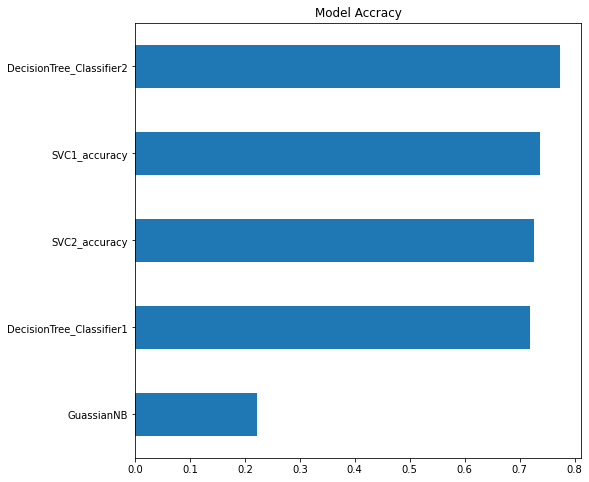

In [ ]:
%matplotlib inline
model_accuracy = pd.Series(data=acc_score, 
        index=['DecisionTree_Classifier1','DecisionTree_Classifier2','SVC1_accuracy','SVC2_accuracy','GuassianNB'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')

**Observations**

The selection of best features helped in the accuracy though it's less when compaired to the previous.Also since the frquency encoding technique is used ,there is no more extra columns in the dataset. The decision tree classifier((criterion='entropy', max_depth=3, random_state=1) is the one giving highest accuracy.
So,Testing with the deciosion tree classifier is done.(acc-77.3)

**Testing**

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/CISC873/test_new.csv') # to read the csv file from the drive
df_test

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,5.75,5,EUR,10,1,0,0,0,0,0,...,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937
1,7.00,7,EUR,5000,0,579,0,0,0,0,...,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270
2,5.00,16,EUR,1000,1,62,0,0,0,0,...,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308
3,18.00,27,EUR,5000,1,1903,0,0,0,0,...,postonny,"86 % avis positifs (15,855 notes)",15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08,913
4,12.00,81,EUR,20000,0,1799,0,0,0,0,...,guangzhouchanny,"88 % avis positifs (151,914 notes)",151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08,403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,EUR,100,1,27,0,0,0,0,...,hernadezyeli,70 % avis positifs (572 notes),572,3.367133,5dc818ca030a154e48a3a8af,0,NaN,summer,2020-08,1166
475,6.00,17,EUR,5000,1,817,0,0,0,0,...,firstcrush,"87 % avis positifs (50,864 notes)",50864,4.079644,587f85cbb8038f4cb049c56c,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,1416
476,4.83,51,EUR,50,1,1,0,0,0,0,...,saulstore,85 % avis positifs (57 notes),57,3.824561,5e3c5fbfe217d492138970c1,0,NaN,summer,2020-08,63
477,3.00,3,EUR,100,1,8,0,0,0,0,...,hey1827,"87 % avis positifs (1,086 notes)",1086,4.056169,5c6d6c28619caa1d94891d06,0,NaN,summer,2020-08,626


In [ ]:

_id=df_test['id']
df_test = df_test.drop(['merchant_id', 'merchant_profile_picture', 'id', 'tags','has_urgency_banner','urgency_text','theme','crawl_month','currency_buyer'], axis=1)

In [ ]:

# columns that are of categorical value
cat_cols = df_test.columns[df_test.dtypes==object].to_list()
print(cat_cols)


['product_color', 'product_variation_size_id', 'shipping_option_name', 'origin_country', 'merchant_title', 'merchant_name', 'merchant_info_subtitle']


In [ ]:
df_test.isnull().sum()

price                            0
retail_price                     0
units_sold                       0
uses_ad_boosts                   0
rating_count                     0
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
product_color                   12
product_variation_size_id        2
product_variation_inventory      0
shipping_option_name             0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
inventory_total                  0
origin_country                   5
merchant_title                   0
merchant_name                    0
merchant_info_subtitle           1
merchant_rating_count            0
merchant_rating                  0
merchant_has_profile_picture     0
dtype: int64

In [ ]:
df_test = df_test.drop(['product_color','product_variation_size_id','merchant_info_subtitle'], axis=1)

In [ ]:
# Applying the same processing steps as in trial5
fe1 = df_test.groupby('shipping_option_name').size()



fe2 = df_test.groupby('origin_country').size()


fe3 = df_test.groupby('merchant_title').size()


fe4 = df_test.groupby('merchant_name').size()




df_test['shipping_name']=df_test['shipping_option_name'].map(fe1).round(2)
df_test['country']=df_test['origin_country'].map(fe2).round(2)
df_test['title']=df_test['merchant_title'].map(fe3).round(2)
df_test['name_merchant']=df_test['merchant_name'].map(fe4).round(2)



df_test = df_test.drop([ 'shipping_option_name','origin_country','merchant_title','merchant_name'], axis=1)
#df_train5.info()

In [ ]:
import numpy as np
num_cols=df_test.select_dtypes([np.number]).columns
num_cols.size

21

In [ ]:
# apply standard scalar to transform the test variables
df_test[num_cols]=sc_std.transform(df_test[num_cols])
df_test

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,...,shipping_is_express,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating,merchant_has_profile_picture,shipping_name,country,title,name_merchant
0,-0.660695,-0.587943,-0.459322,1.144894,-0.449773,-0.32654,-0.139963,-0.301361,-0.10536,-1.298629,...,-0.042816,4.877942,0.053144,-0.310789,-8.499957,-0.429164,-2.598865,-3.482334,-0.740589,-0.663567
1,-0.334724,-0.525046,0.048581,-0.873443,-0.165584,-0.32654,-0.139963,-0.301361,-0.10536,0.800801,...,-0.042816,-0.469592,0.053144,-0.261927,0.111675,-0.429164,-2.598865,-3.482334,-0.740589,-0.663567
2,-0.856277,-0.242008,-0.358556,1.144894,-0.419341,-0.32654,-0.139963,-0.301361,-0.10536,-0.598819,...,-0.042816,0.025550,0.053144,-0.188948,-0.033871,-0.429164,-2.598865,-3.482334,-0.740589,-0.663567
3,2.533815,0.103927,0.048581,1.144894,0.484272,-0.32654,-0.139963,-0.301361,-0.10536,0.800801,...,-0.042816,0.075064,0.053144,-0.126809,0.084350,-0.429164,-2.598865,-3.482334,-0.740589,-0.663567
4,0.969157,1.802156,1.575346,-0.873443,0.433226,-0.32654,-0.139963,-0.301361,-0.10536,0.800801,...,-0.042816,-0.122993,0.053144,1.452304,0.458777,-0.429164,-2.598865,-3.482334,1.331418,1.096819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,2.012263,-0.304905,-0.450162,1.144894,-0.436520,-0.32654,-0.139963,-0.301361,-0.10536,0.800801,...,-0.042816,-0.271535,0.053144,-0.304185,-3.339142,-0.429164,-2.598865,-6.262529,-0.740589,-0.663567
475,-0.595500,-0.210559,0.048581,1.144894,-0.048767,-0.32654,-0.139963,-0.301361,-0.10536,-1.485245,...,-0.042816,0.025550,0.053144,0.279509,0.217772,2.330110,-2.598865,-3.482334,-0.049920,-0.076772
476,-0.900609,0.858695,-0.455251,1.144894,-0.449282,-0.32654,-0.139963,-0.301361,-0.10536,-1.391937,...,-0.042816,-0.073479,0.053144,-0.310162,-1.055621,-0.429164,-2.598865,-6.262529,-0.740589,-0.663567
477,-1.377829,-0.650841,-0.450162,1.144894,-0.445846,-0.32654,-0.139963,-0.301361,-0.10536,-1.391937,...,-0.042816,-0.717163,0.053144,-0.298219,0.100586,-0.429164,-2.598865,-3.482334,-0.740589,-0.663567


In [ ]:
 #not-seen string value filled with -1                                   
df_test=df_test.fillna(-1)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         479 non-null    float64
 1   retail_price                  479 non-null    float64
 2   units_sold                    479 non-null    float64
 3   uses_ad_boosts                479 non-null    float64
 4   rating_count                  479 non-null    float64
 5   badges_count                  479 non-null    float64
 6   badge_local_product           479 non-null    float64
 7   badge_product_quality         479 non-null    float64
 8   badge_fast_shipping           479 non-null    float64
 9   product_variation_inventory   479 non-null    float64
 10  shipping_option_price         479 non-null    float64
 11  shipping_is_express           479 non-null    float64
 12  countries_shipped_to          479 non-null    float64
 13  inven

In [ ]:
df_test=df_test[selected_cols]

In [ ]:
clf=models_5[1]
clf


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

In [ ]:
pred_test=clf.predict(df_test)


In [ ]:
pred_df=pd.DataFrame(data={'id':np.asarray(_id),'rating':pred_test})
pred_df.to_csv('predictions_new.csv',index=False)